In [1]:
import pandas as pd

In [2]:
nums = pd.Series([5, 6, 8, 9, 11, 13, 17, 22])

nums.quantile(1/2)

10.0

In [33]:
nums.quantile([1/4, 2/4, 3/4])

0.25     7.5
0.50    10.0
0.75    14.0
dtype: float64

In [7]:
nums.quantile([1/4, 0.5, .75], interpolation="midpoint")

0.25     7.0
0.50    10.0
0.75    15.0
dtype: float64

In [9]:
lower_quartile = nums.quantile(1/4)
upper_quartile = nums.quantile(3/4)

inter_quartile_range = upper_quartile - lower_quartile

inter_quartile_range

6.5

<Axes: >

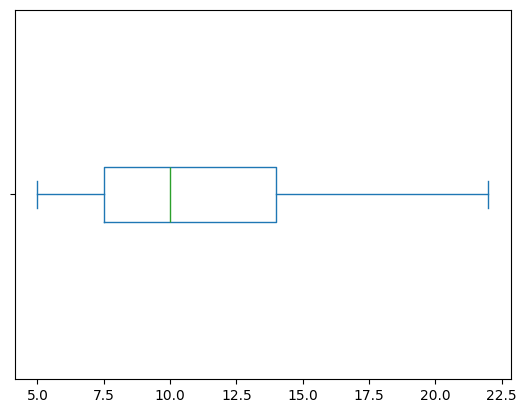

In [12]:
nums.plot.box(vert = False)

In [13]:
nums.quantile([0.25, 0.5, 0.75])

0.25     7.5
0.50    10.0
0.75    14.0
dtype: float64

In [14]:
file = pd.read_csv("Stars.csv")

stars = pd.DataFrame(file)

stars.head()

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [17]:
stars['Temperature'].quantile([0.25, 0.50, 0.75])

0.25     3344.25
0.50     5776.00
0.75    15055.50
Name: Temperature, dtype: float64

<Axes: >

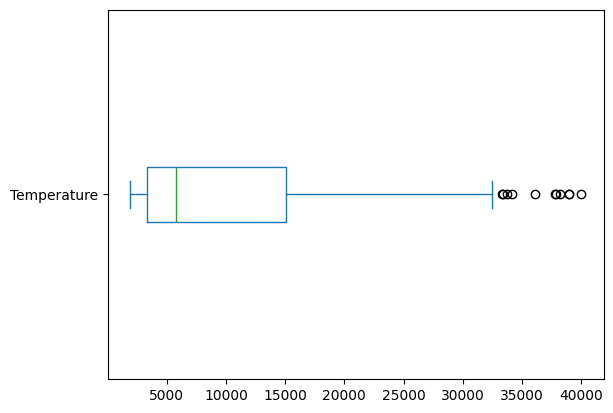

In [16]:
stars['Temperature'].plot.box(vert = False)

In [18]:
stars_upper_quartile = stars['Temperature'].quantile(0.75)
stars_lower_quartile = stars['Temperature'].quantile(0.25)

stars_inter_quartile_range = stars_upper_quartile - stars_lower_quartile

stars_inter_quartile_range

11711.25

In [27]:
stars_lower_quartile

3344.25

In [28]:
stars_upper_quartile

15055.5

In [31]:
right_whisker = stars_upper_quartile + (1.5 * stars_inter_quartile_range)

In [32]:
right_whisker

32622.375

### Challenge

There were no outliers to the left of our box-plot of star temperatures, so there were no "cold" stars that were found to be outliers. But there are still a group of stars we can regard as the coldest 2% of stars in our dataset. Find them.

#### Initial Plan

* Maybe look at using sort_values to sort the values by temperature in ascending order
* Work out how many rows is 2% of rows -  think it's 240 rows total
* Another way could be to use the quantile method and get the temperature value that is in the 2% quantile and then filter the dataframe base on this this value

In [34]:
# Find out how many rows there are 
stars.shape

(240, 7)

In [36]:
# Calculate how many rows is 2% of total rows
0.02 * 240

4.8

In this case, let's get 5 rows given if you round up the number 4.8 it's 5 rows

In [37]:
stars.sort_values(by='Temperature').iloc[0:5]

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
4,1939,0.000138,0.103,20.06,Red,M,0
2,2600,0.000300,0.102,18.70,Red,M,0
7,2600,0.000400,0.096,17.40,Red,M,0
78,2621,0.000600,0.098,12.81,Red,M,1
6,2637,0.000730,0.127,17.22,Red,M,0


Let's see if we could use quantile to find out what 2% quantile value of temperature is

In [38]:
stars['Temperature'].quantile(0.02)

2647.14

Essentially this means anything 2647.14 or below in temperature would meet the 2% quantile

In [39]:
stars[stars['Temperature'] <= 2647.14]

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
2,2600,0.000300,0.102,18.70,Red,M,0
4,1939,0.000138,0.103,20.06,Red,M,0
6,2637,0.000730,0.127,17.22,Red,M,0
7,2600,0.000400,0.096,17.40,Red,M,0
78,2621,0.000600,0.098,12.81,Red,M,1


Both methods work but using the quantile method and filtering down this way seems better and less prune to errors. The other method means I would need to round up on the number of rows needed